In [ ]:
### If running this on Google Colab, uncomment and run the following lines:
#!pip install netin
#!wget -nc https://raw.githubusercontent.com/snma-tutorial/www2023/main/exercises/helper.py
#!mkdir plots

# Exercise \#3

Sampling biases

## Dependencies

In [ ]:
import netin
from netin import *
from netin import viz
from netin import sampling
from netin import stats

## Helpers

In [ ]:
%load_ext autoreload
%autoreload 2

import helper

``` python
# Updates the name of a graph (by default it is the model name)
helper.update_name_homophily(data: Graph | pd.DataFrame) -> str
```


``` python
# Plots the original graphs (row=0) and the samples (row>=1)
helper.plot_samples(originals: List[netin.Graph], samples: List[List[netin.Graph]], fn: str = None, **kwargs)
```

``` python
# Loads the Facebook friends graph
helper.load_fb_data(path: str = 'data/fb_friends')
``` 

# Directed networks

## Comparing the effects of homophily  in sampling
- Create 3 `DPAH` graphs
- Make sure all of them have the same number of nodes `n`, edge density `d`, fraction of minority `f_m`, activities `plo_M` and `plo_m`, and random seed `seed`.
- Make sure they have the same level of homophily within the majority group (e.g., `h_MM=0.5`) and vary only the homophily within the minority group, for example:
  -  Graph 1: `h_MM=0.5` and `h_mm=0.1`
  -  Graph 2: `h_MM=0.5` and `h_mm=0.5`
  -  Graph 3: `h_MM=0.5` and `h_mm=0.9`
- Make 6 random samples using the sampling techniques from `netin.sampling.*`
  - Make sure they all have the same `pseeds` (sample size)
- Plot the graphs and the samples.
- Plot the representation of groups for each sample
  - The CDF of the `in_degree` distribution and the CCDF of the `pagerank` distribution. 
  - Which sample looks closest to the full data? Does it depend on h?

## Bonus: Fit the undirected models to a given real network
- Load the `fb_friends` network, and make sure it is a `netin` graph.
- Get to know the data (`.info()`)
- Fit the `PA`, `PAH`, and the `PATC` models to the graph.
- Visualize the graphs.
- Compare their `degree` and `pagerank` distributions (plot the `pdf` and `cdf`).
- Choose four sampling techniques and extract a sample for each network using the same sample size ``pseeds=0.2``. 
  - What properties were preserved? ``f_m``? ``similarity``?

### Task 1. Generating graphs

In [3]:
### Fix some parameters to later compare the effects of homophily

n = 1000     # number of nodes
d = 0.0012   # edge density
f_m = 0.2    # fraction of minority
plo_M = 2.1  # power-law of out-degree distribution majority 
plo_m = 2.1  # power-law of out-degree distribution minority
h_MM = 0.5   # homophily majority
seed = 12345 # random seed (reproducibility)

In [4]:
### Graphs

homophily_values = [0.1, 0.5, 0.9]
graphs = []

for h_mm in homophily_values: # homophily within each class
    # generating graph
    g = DPAH(n=n, d=d, f_m=f_m, plo_M=plo_M, plo_m=plo_m, h_MM=h_MM, h_mm=h_mm, seed=seed)
    g.generate()

    # updating name to include homophily values
    g.set_model_name(helper.update_name_homophily(g)) 
    graphs.append(g)
    

### Task 2. Sampling

In [5]:
### Fix the sample size
sample_size = 0.1

#### 2.1 Random Nodes

In [6]:
### Genereting subgraphs
### via sampling

samples_nodes = []
for g in graphs:
    gs = sampling.RandomNodes(g=g, pseeds=sample_size, random_seed=seed)
    gs.sampling()
    samples_nodes.append(gs.sample)
    

#### 2.2 Random Edges

In [7]:
### Genereting subgraphs
### via sampling

samples_edges = []
for g in graphs:
    gs = sampling.RandomEdges(g=g, pseeds=sample_size, random_seed=seed)
    gs.sampling()
    samples_edges.append(gs.sample)


#### 2.3 Random Neighbor

In [8]:
### Genereting subgraphs
### via sampling

samples_neighbor = []
for g in graphs:
    gs = sampling.RandomNeighbor(g=g, pseeds=sample_size, random_seed=seed)
    gs.sampling()
    samples_neighbor.append(gs.sample)
    

#### 2.4 Degree Rank (desc)

In [9]:
samples_degree = []
for g in graphs:
    gs = sampling.DegreeRank(g=g, pseeds=sample_size, random_seed=seed, order='desc')
    gs.sampling()
    samples_degree.append(gs.sample)
    

#### 2.5 Degree Group Rank (desc)

In [10]:
samples_group = []
for g in graphs:
    gs = sampling.DegreeGroupRank(g=g, pseeds=sample_size, random_seed=seed, order='desc')
    gs.sampling()
    samples_group.append(gs.sample)
    

#### 2.4 Partial Crawls

In [11]:
samples_crawls = []
for g in graphs:
    gs = sampling.PartialCrawls(g=g, pseeds=sample_size, random_seed=seed)
    gs.sampling()
    samples_crawls.append(gs.sample)
    

### Task 3. Visualize

In [12]:
### Setting the look & feel
viz.reset_style()
viz.set_paper_style()

plots/3_all_graphs_and_samples.pdf saved


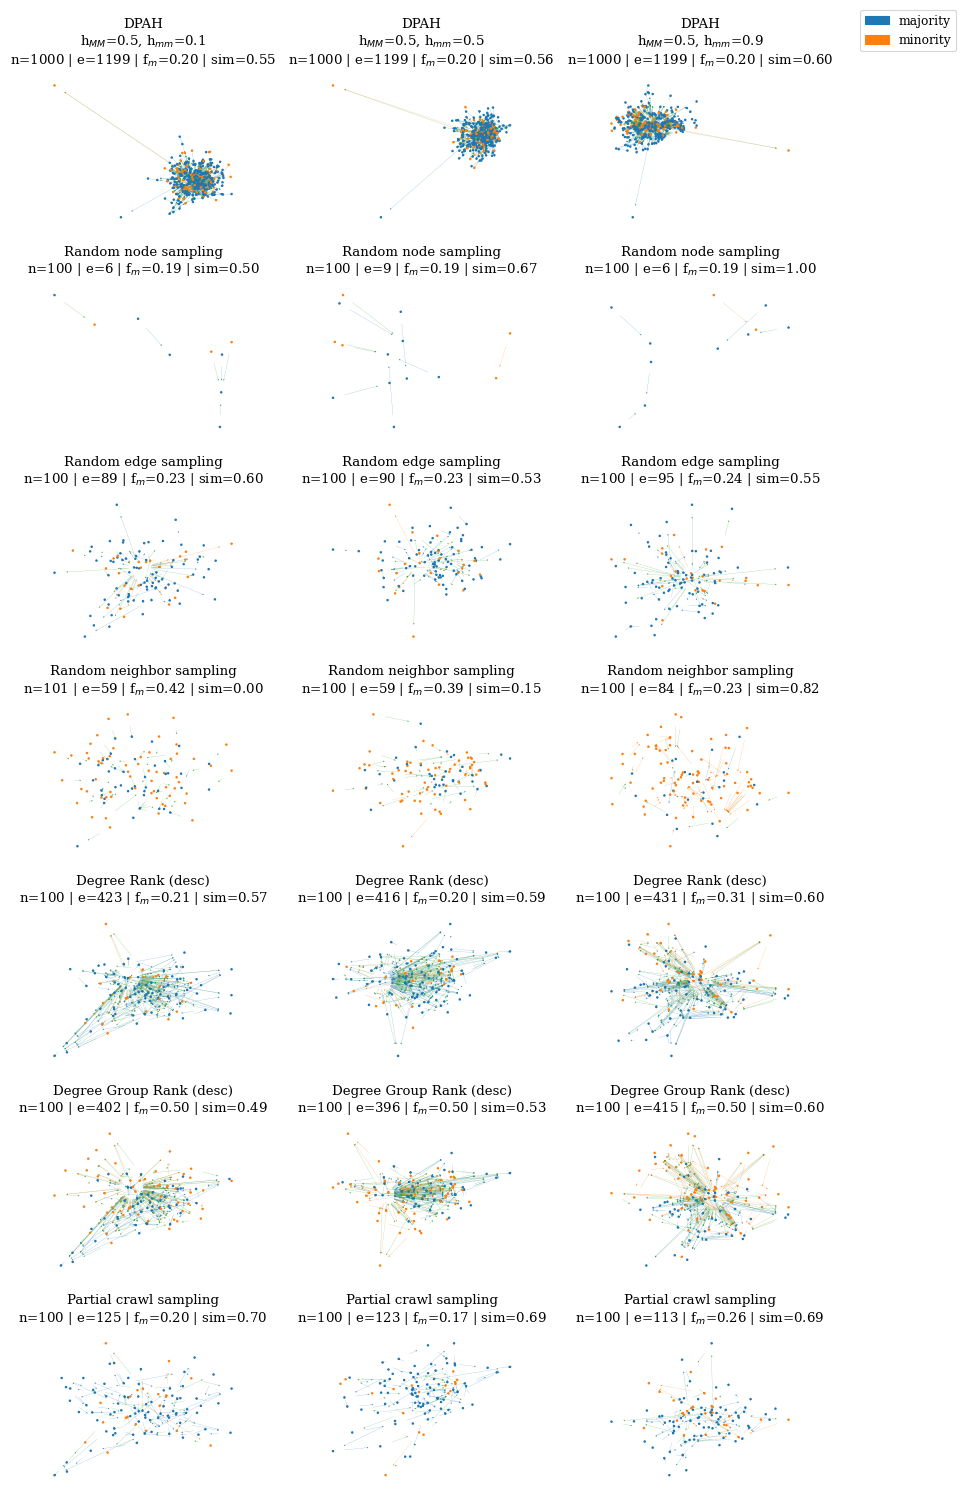

In [13]:
### Plotting al graphs and samples at once
### Showing 3 graphs per row

samples = [samples_nodes, samples_edges, samples_neighbor, samples_degree, samples_group, samples_crawls]
helper.plot_samples(graphs, 
                    samples,  
                    figsize = (8, 15),
                    edge_width = 0.1,
                    wspace = 0.3,
                    ignore_singletons=True, # <-- hides nodes with degree 0
                    seed=seed,
                    fn = 'plots/3_all_graphs_and_samples.pdf')


### Task 4. Representation

In [14]:
all_graphs = graphs + [s for ss in samples for s in ss]
metadata = []
for g in all_graphs:
    tmp = g.get_node_metadata_as_dataframe(include_graph_metadata=True, n_jobs=1)
    tmp.name = helper.get_title_graph(g)
    metadata.append(tmp)

100%|██████████| 8/8 [00:00<00:00, 929.59it/s]


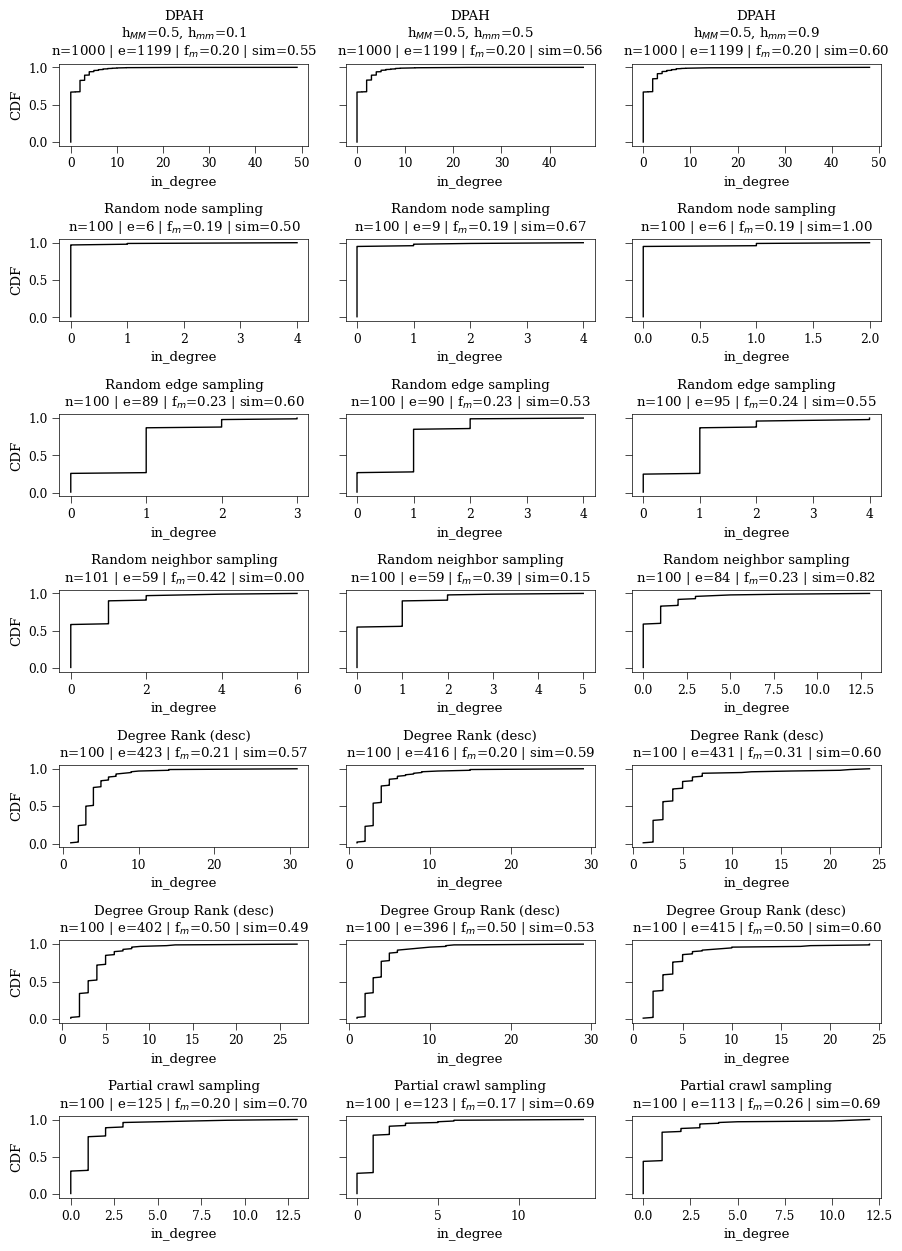

In [15]:
### Plot the CDF of the in_degree

col_name = 'in_degree'
viz.plot_distribution(metadata, 
                      col_name=col_name,
                      sharex=False, sharey=True,
                      cell_size=(3,1.8),
                      wspace = 0.15,
                      nc = 3,
                      get_x_y_from_df_fnc=stats.distributions.get_cdf)

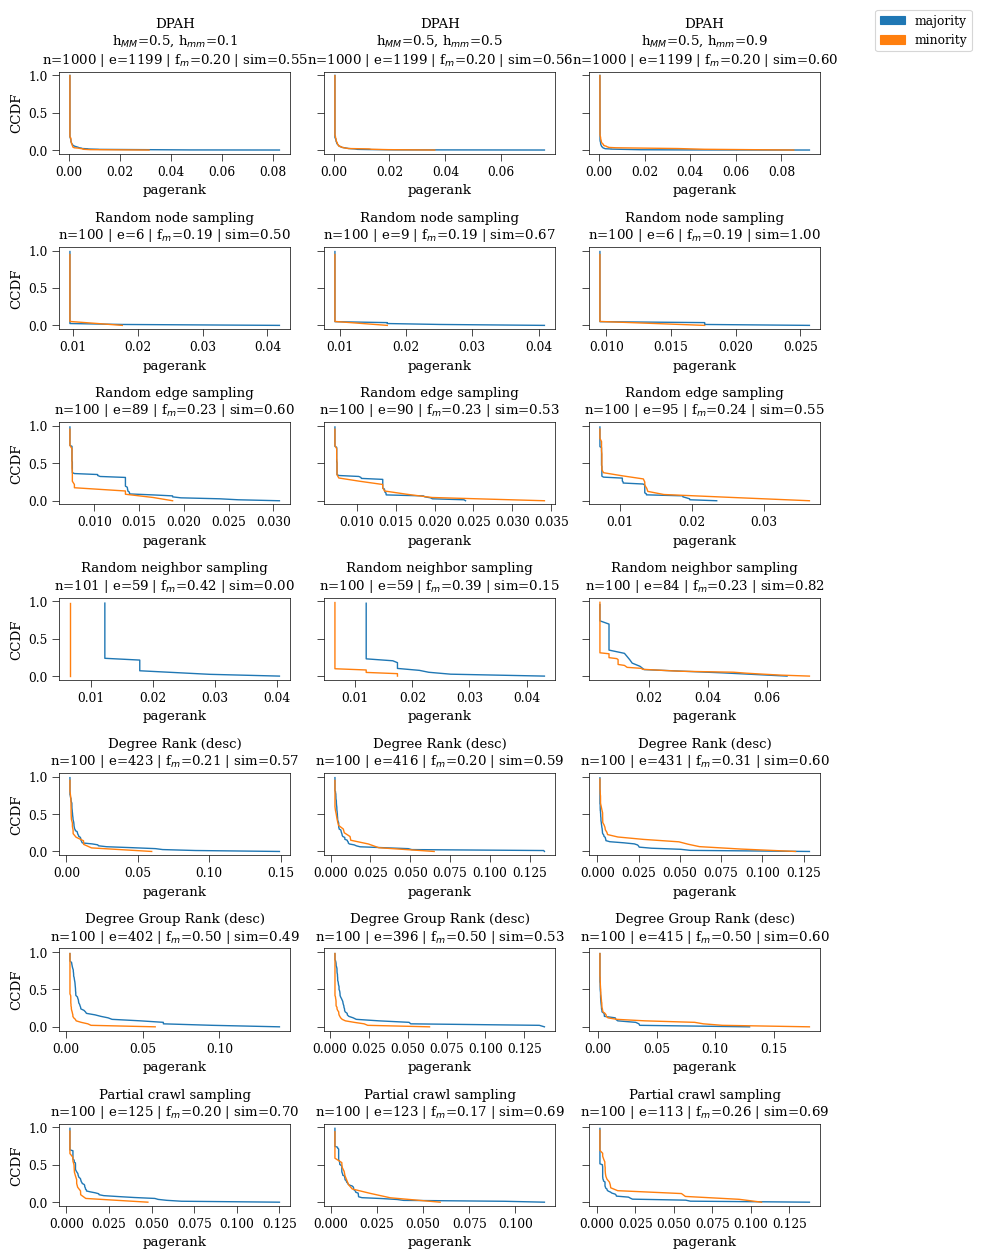

In [16]:
### Plot the CCDF of the pagerank for each class

col_name = 'pagerank'
hue = 'class_label'
viz.plot_distribution(metadata, 
                      col_name=col_name,
                      sharex=False, sharey=True,
                      cell_size=(2.8, 1.8),
                      wspace = 0.15,
                      nc = 3,
                      hue=hue,
                      get_x_y_from_df_fnc=stats.distributions.get_ccdf)

# Bonus: Model fitting

In [17]:
### First download the data
### Source:
### Sapiezynski, Piotr; Stopczynski, Arkadiusz; Lassen, David Dreyer; Jørgensen, Sune Lehmann (2019): 
### The Copenhagen Networks Study interaction data. figshare. Dataset. 
### https://doi.org/10.6084/m9.figshare.7267433.v1

!mkdir -p data/fb_friends/ 
!wget -nc https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13389839/fb_friends.README -P data/fb_friends/
!wget -nc https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13389320/fb_friends.csv -P data/fb_friends/
!wget -nc https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13389440/genders.csv -P data/fb_friends/

--2023-05-01 11:58:12--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13389839/fb_friends.README
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.104.202, 52.218.26.147, 52.92.16.136, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.104.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193 [application/octet-stream]
Saving to: ‘data/fb_friends/fb_friends.README’

fb_friends.README   100%[===================>]     193  --.-KB/s    in 0s      

2023-05-01 11:58:13 (8.37 MB/s) - ‘data/fb_friends/fb_friends.README’ saved [193/193]

--2023-05-01 11:58:13--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/13389320/fb_friends.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.45.96, 52.218.26.147, 52.92.16.136, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.45.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

### Task B1. Load a real-world network

In [18]:
### Load the graph as a `networkx` undirected graph

fb_g_nx = helper.load_fb_data_as_networkx()

In [19]:
### Convert the `networkx` undirected graph to a `netin` undirected graph

fb_g = netin.convert_networkx_to_netin(fb_g_nx, name="fb_friends", class_attribute='gender')

/opt/anaconda3/envs/snma/lib/python3.9/site-packages/netin/stats/networks.py:193: UserWarning: Graph contains more than two classes: Counter({0: 581, 1: 166, -1: 53})
  warnings.warn(f'Graph contains more than two classes: {counter}')


### Task B2. Fit the directed models to this network

In [20]:
### Fit the PA, PAH, and PATC models to the graph g

g_pa = PA.fit(fb_g, k=2)
g_pah = PAH.fit(fb_g, k=2)
g_patc = PATC.fit(fb_g, k=2)

In [21]:
### Showing the basic info of the real data

fb_g.info()

=== Params ===
n: 800
f_m: 0.2075
k: 1
seed: 1736121044
=== Model ===
Model: Undirected
Class attribute: gender
Class values: (0, 1, -1)
Class labels: ['male', 'female', 'unknown']
Generation time: None (secs)
=== Computed ===
- is directed: False
- number of nodes: 800
- number of edges: 6429
- minimum degree: 1
- fraction of minority: 0.2075
- edge-type counts: Counter({'MM': 3193, 'mM': 1178, 'Mm': 917, 'mm': 577})
- density: 0.020115769712140175
- diameter: 7
- average shortest path length: 2.9800250312891112
- average degree: 16.0725
- degree assortativity: 0.18275205735892727
- attribute assortativity (gender): 0.10568286960668061
- transitivity: 0.24430902767456378
- average clustering: 0.3153509697401216
- Powerlaw fit (degree):
- male: alpha=1.000000150871292, sigma=6.259195881442649e-09, min=1.0, max=101.0
- female: alpha=1.000000465414908, sigma=3.144982497637263e-08, min=1.0, max=71.0


In [22]:
### Showing the basic info of the real data

g_pa.info()

=== Params ===
n: 800
f_m: 0.2075
k: 2
seed: 3258746473
=== Model ===
Model: PA
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 0.6396489143371582 (secs)
=== Computed ===
- is directed: False
- number of nodes: 800
- number of edges: 1596
- minimum degree: 2
- fraction of minority: 0.2075
- edge-type counts: Counter({'MM': 1057, 'Mm': 276, 'mM': 207, 'mm': 56})
- density: 0.004993742177722153
- diameter: 7
- average shortest path length: 3.912036921151439
- average degree: 3.99
- degree assortativity: -0.09960996722993616
- attribute assortativity (m): 0.0022514666243851488
- transitivity: 0.011226305134654316
- average clustering: 0.02855604018753689
- Powerlaw fit (degree):
- M: alpha=2.474532631477347, sigma=0.05856117189548119, min=2.0, max=74.0
- m: alpha=2.506849653115402, sigma=0.11695421504259246, min=2.0, max=24.0


In [23]:
### Showing the basic info of the fitted PAH graph

g_pah.info()

=== Params ===
n: 800
f_m: 0.2075
k: 2
h_MM: 0.3649102970399632
h_mm: 0.7749463068046584
mixing matrix: 
[[0.3649103  0.6350897 ]
 [0.22505369 0.77494631]]
seed: 1157800541
=== Model ===
Model: PAH
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 0.8837103843688965 (secs)
=== Computed ===
- is directed: False
- number of nodes: 800
- number of edges: 1596
- minimum degree: 2
- fraction of minority: 0.2075
- edge-type counts: Counter({'MM': 798, 'mM': 466, 'mm': 171, 'Mm': 161})
- density: 0.004993742177722153
- diameter: 7
- average shortest path length: 3.909314768460576
- average degree: 3.99
- degree assortativity: -0.1612375714892053
- attribute assortativity (m): 0.07088989441930586
- transitivity: 0.011081434335398078
- average clustering: 0.038814895418150135
- Powerlaw fit (degree):
- M: alpha=2.7076524032076783, sigma=0.06781954077325737, min=2.0, max=39.0
- m: alpha=2.084869137716806, sigma=0.08420217515614749, min=2.0, max=88.0
- Empirical ho

In [24]:
### Showing the basic info of the fitted PATC graph

g_patc.info()

=== Params ===
n: 800
f_m: 0.2075
k: 2
tc: 0.3153509697401216
seed: 620146000
=== Model ===
Model: PATC
Class attribute: m
Class values: [0, 1]
Class labels: ['M', 'm']
Generation time: 0.5857326984405518 (secs)
=== Computed ===
- is directed: False
- number of nodes: 800
- number of edges: 1596
- minimum degree: 2
- fraction of minority: 0.2075
- edge-type counts: Counter({'MM': 1061, 'Mm': 272, 'mM': 203, 'mm': 60})
- density: 0.004993742177722153
- diameter: 8
- average shortest path length: 4.046239048811014
- average degree: 3.99
- degree assortativity: -0.09872798070290392
- attribute assortativity (m): 0.018777322249654487
- transitivity: 0.05789473684210526
- average clustering: 0.27987330899390306
- Powerlaw fit (degree):
- M: alpha=2.4868598350357427, sigma=0.05905074769133899, min=2.0, max=90.0
- m: alpha=2.558875090574285, sigma=0.12099217210597385, min=2.0, max=25.0


### Task B3. Visualize them

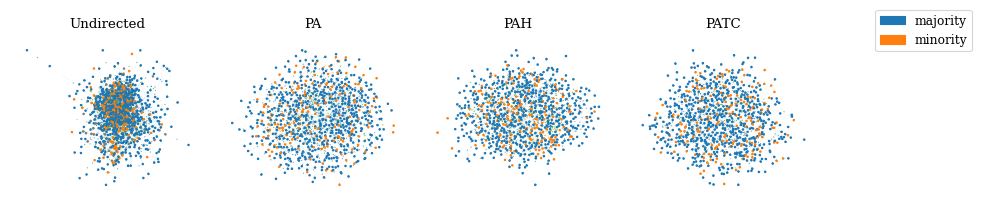

In [25]:
### Plot the original real graph and their fitted synthetic versions

fb_graphs = [fb_g, g_pa, g_pah, g_patc]
viz.plot_graph(fb_graphs, 
               cell_size=2.1,
               wspace=0.05,
               share_pos=False)

### Task B4. Compare their (node) distributions

In [26]:
fb_metadata = [fb_g.get_node_metadata_as_dataframe(), 
               g_pa.get_node_metadata_as_dataframe(),
               g_pah.get_node_metadata_as_dataframe(),
               g_patc.get_node_metadata_as_dataframe()]

100%|██████████| 8/8 [00:01<00:00,  4.50it/s]


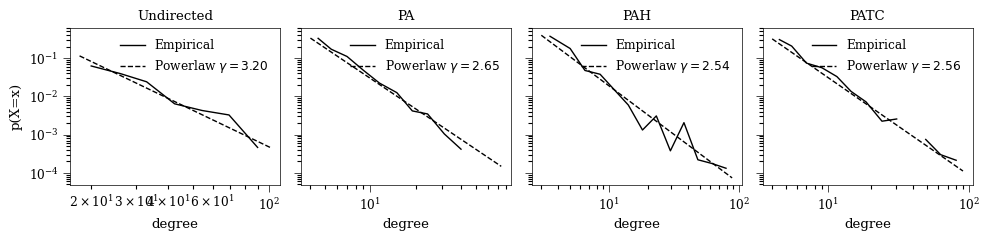

In [27]:
### Plot powerlaw fit of degree (PDF)

col_name = 'degree'
kind = 'pdf'
viz.plot_powerlaw_fit(fb_metadata, 
                      col_name=col_name, kind=kind, 
                      sharey=True, cell_size=2.5, wspace=0.1)

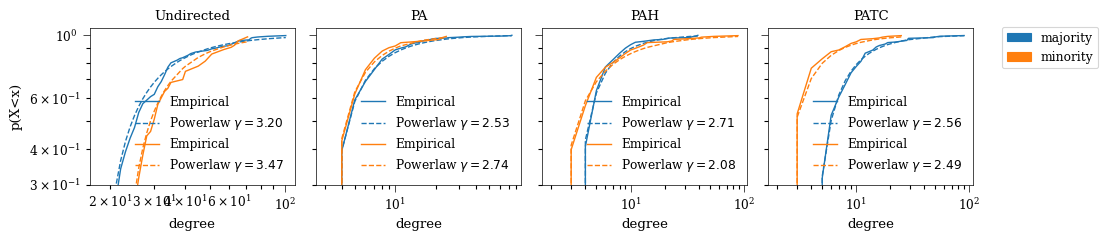

In [28]:
### Plot powerlaw fit of degree (CDF) for each group

col_name = 'degree'
kind = 'cdf'
hue = 'class_label'
viz.plot_powerlaw_fit(fb_metadata, 
                      col_name=col_name, kind=kind, hue=hue,
                      sharey=True, cell_size=2.5, wspace=0.1)

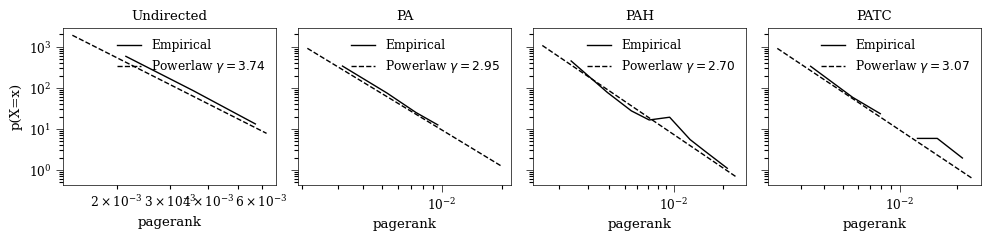

In [29]:
### Plot powerlaw fit of pagerank (PDF)

col_name = 'pagerank'
kind = 'pdf'
viz.plot_powerlaw_fit(fb_metadata, 
                      col_name=col_name, kind=kind, 
                      sharey=True, cell_size=2.5, wspace=0.1)

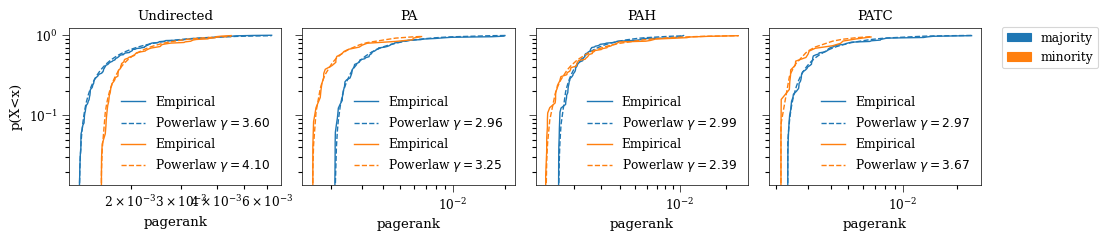

In [30]:
### Plot powerlaw fit of pagerank (CDF) for each group

col_name = 'pagerank'
kind = 'cdf'
hue = 'class_label'
viz.plot_powerlaw_fit(fb_metadata, 
                      col_name=col_name, kind=kind, hue=hue,
                      sharey=True, cell_size=2.5, wspace=0.1)

### Task B5. Compare their samples

In [31]:
### Ignore user warning about "Graph contains more than two classes"

import warnings
warnings.simplefilter("ignore", UserWarning)

In [32]:
### Create a random sample for each graph and sampling method

fb_samples = []
sample_size = 0.2

for sampling_method in [sampling.RandomNodes, sampling.RandomEdges, sampling.DegreeRank, sampling.PartialCrawls]:
    samples = []
    for g in fb_graphs:
        tmp = sampling_method(g=g, pseeds=sample_size)
        tmp.sampling()
        samples.append(tmp.sample)
    fb_samples.append(samples)
    

plots/3_fb_friends_and_samples.pdf saved


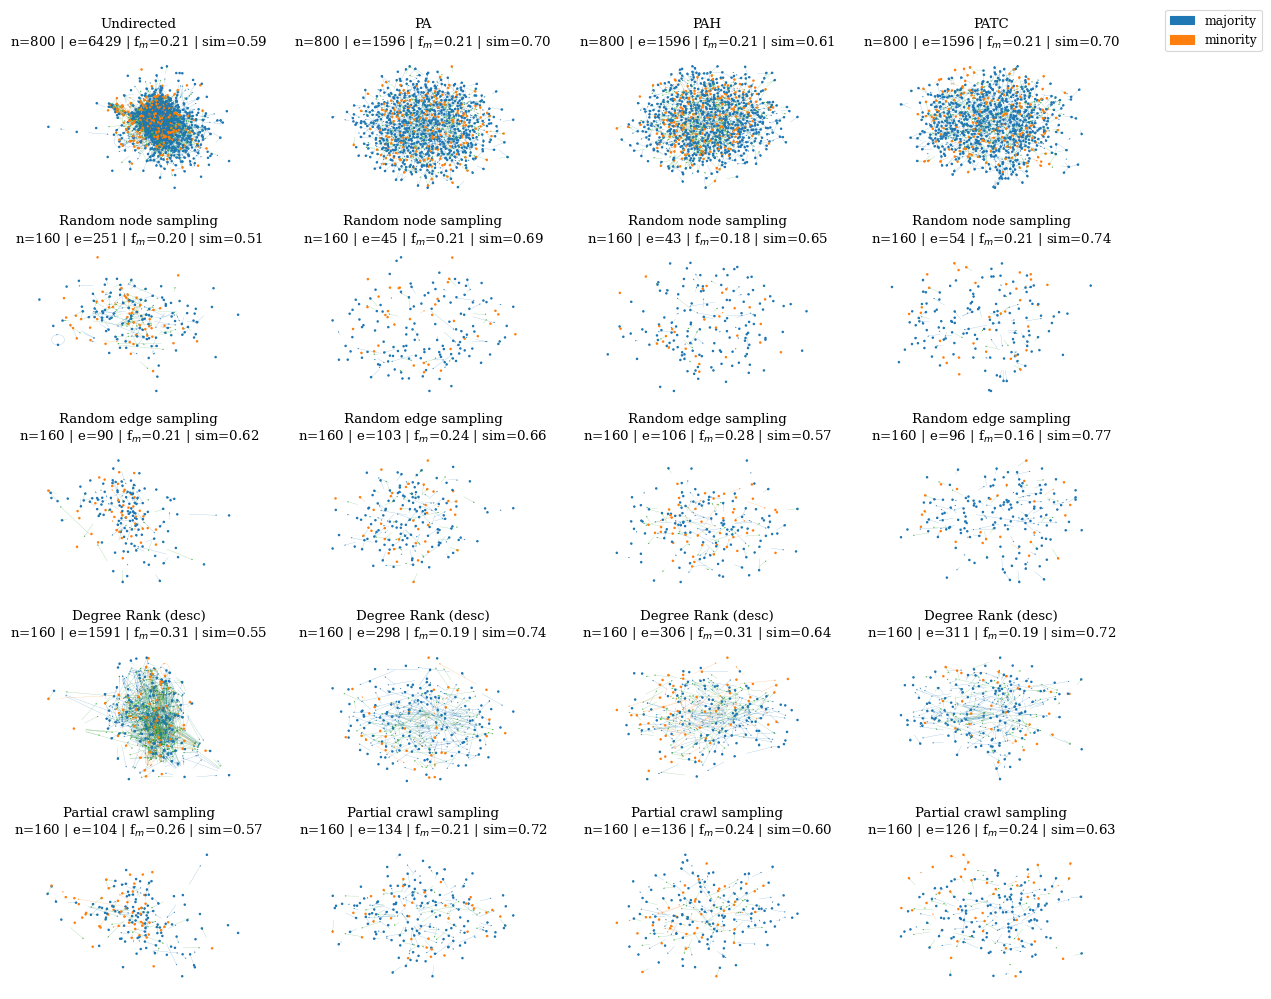

In [33]:
### Plot the original networks and their samples

helper.plot_samples(fb_graphs, fb_samples,  
                   figsize = (11, 10),
                   edge_width = 0.1,
                   wspace = 0.3,
                   seed=seed,
                   fn = 'plots/3_fb_friends_and_samples.pdf')
